# Analyse en composantes principales

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# 1) Chargement des données

In [3]:
df = pd.read_csv("track.csv", sep=";")
print(df.head())

    100M   200M   400M  800M  1500M  5000M  10000M  MARATHON      PAYS
0  10.39  20.81  46.84  1.81   3.70  14.04   29.36    137.72  argentin
1  10.31  20.06  44.84  1.74   3.57  13.28   27.66    128.30  australi
2  10.44  20.81  46.82  1.79   3.60  13.26   27.72    135.90   austria
3  10.34  20.68  45.04  1.73   3.60  13.22   27.45    129.95   belgium
4  10.28  20.58  45.91  1.80   3.75  14.68   30.55    146.62   bermuda


In [4]:
X = df.iloc[:, 0:8]
print("\nVariables utilisées pour l'ACP :")
print(X.columns)


Variables utilisées pour l'ACP :
Index(['100M', '200M', '400M', '800M', '1500M', '5000M', '10000M', 'MARATHON'], dtype='object')


# 2) Standardisation



In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3) Matrice de corrélation


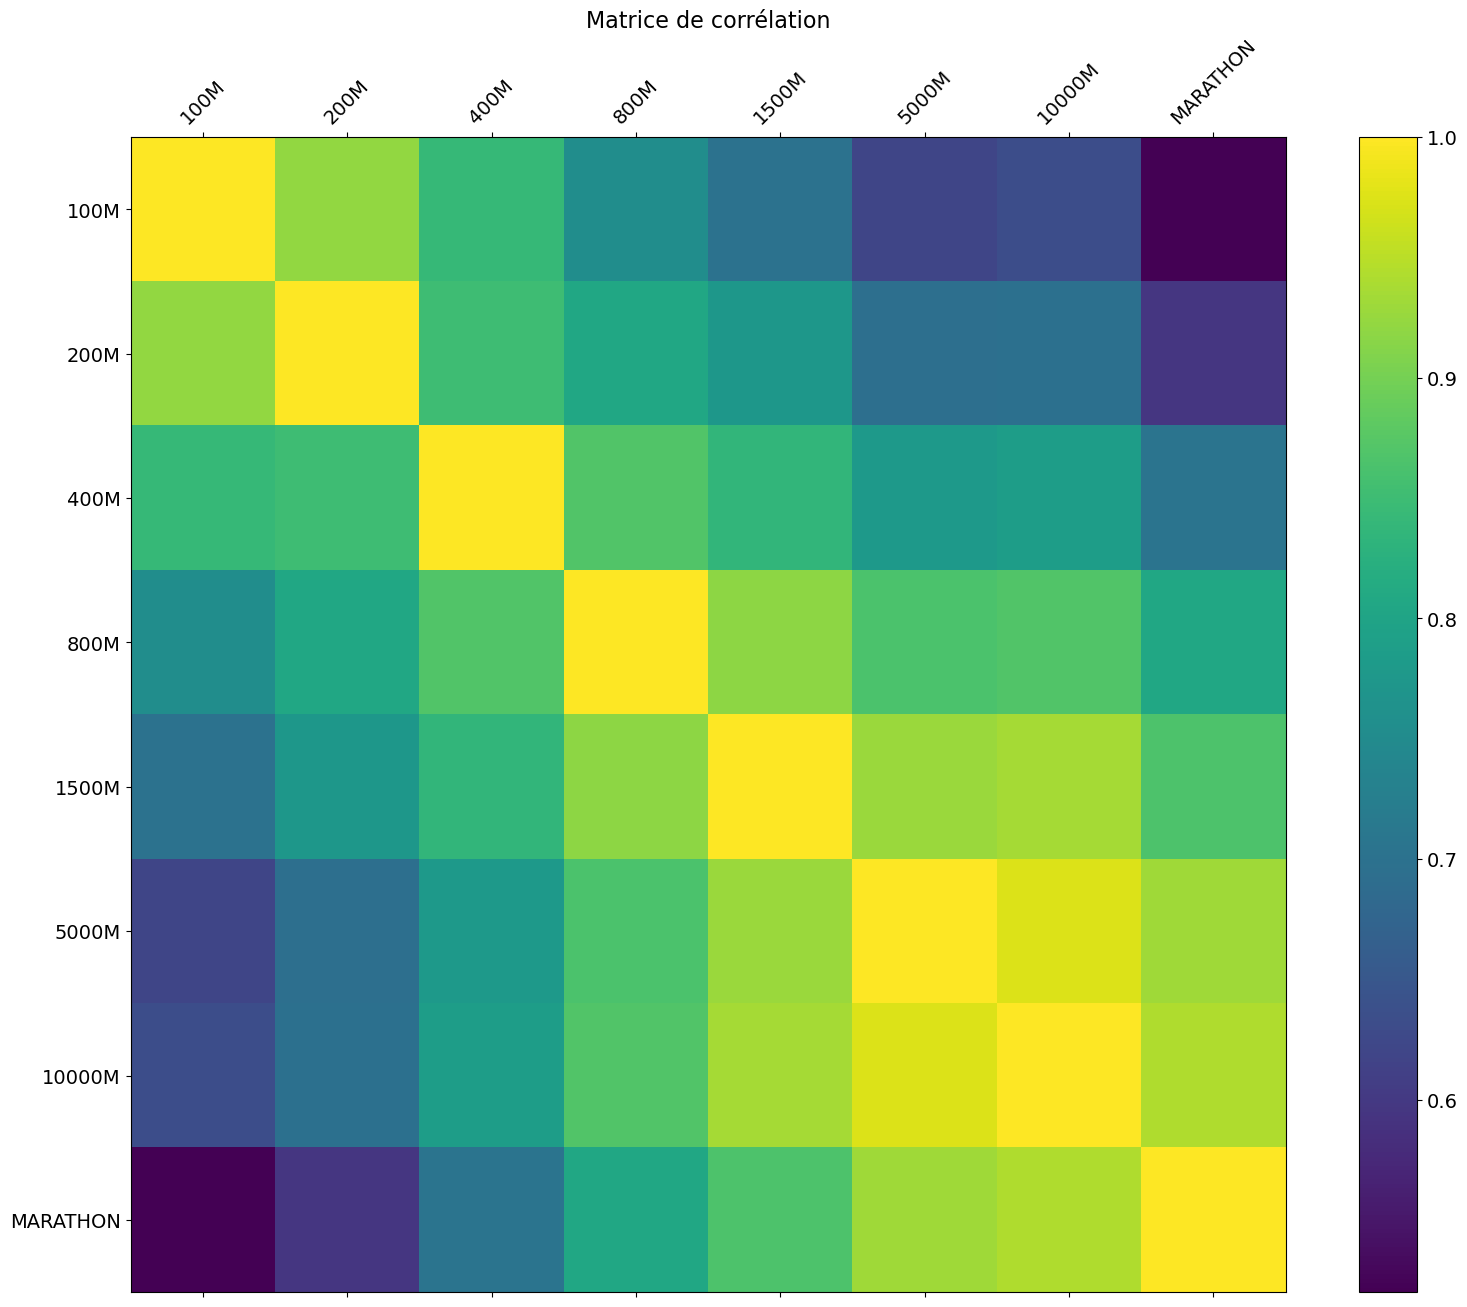

,100M,200M,400M,800M,1500M,5000M,10000M,MARATHON
100M,1.000000,0.922638,0.841147,0.756028,0.700238,0.619462,0.632539,0.519949
200M,0.922638,1.000000,0.850727,0.806627,0.774951,0.695377,0.696539,0.596184
400M,0.841147,0.850727,1.000000,0.870171,0.835269,0.778614,0.787205,0.704991
800M,0.756028,0.806627,0.870171,1.000000,0.918044,0.863594,0.869049,0.806476
1500M,0.700238,0.774951,0.835269,0.918044,1.000000,0.928114,0.934697,0.865549
5000M,0.619462,0.695377,0.778614,0.863594,0.928114,1.000000,0.974635,0.932188
10000M,0.632539,0.696539,0.787205,0.869049,0.934697,0.974635,1.000000,0.943176
MARATHON,0.519949,0.596184,0.704991,0.806476,0.865549,0.932188,0.943176,1.000000


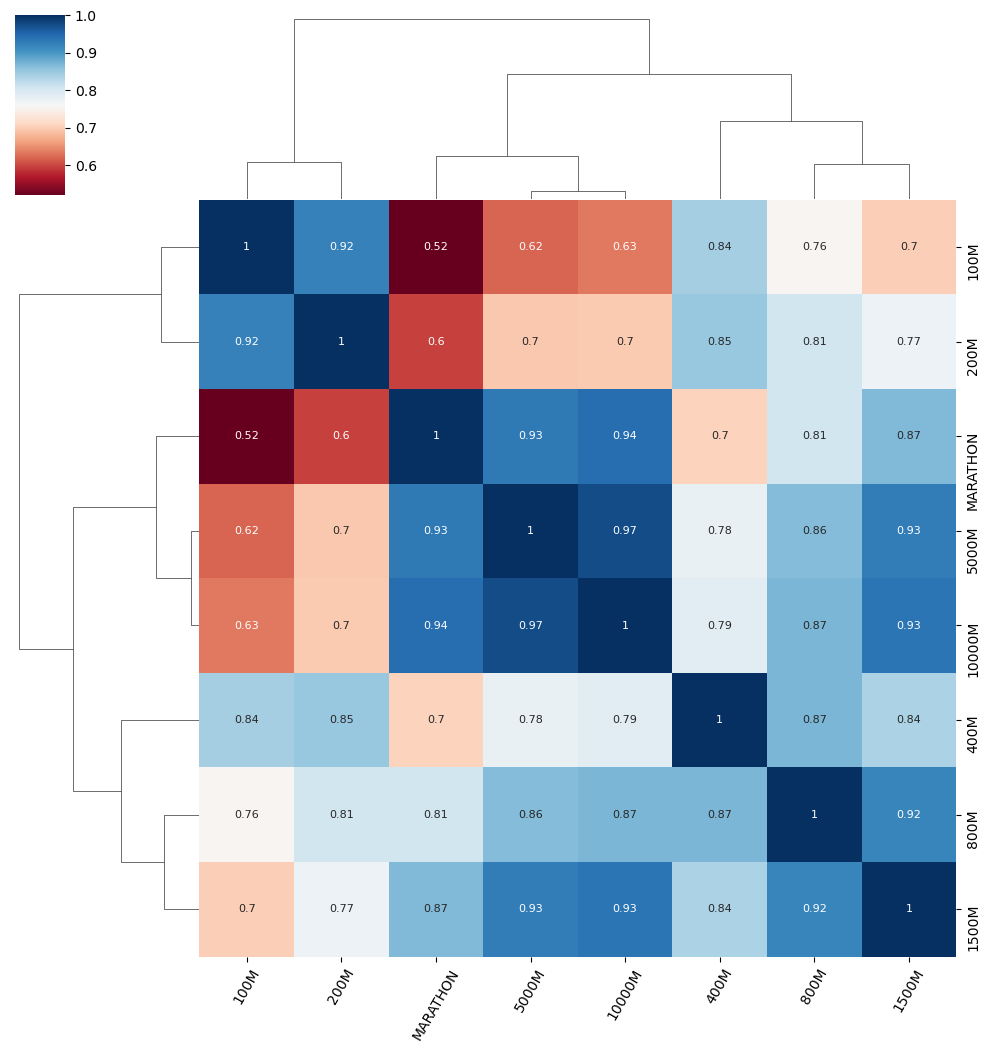

In [6]:
fig, ax = plt.subplots(figsize=(19, 15))
im = ax.matshow(X.corr().values)
ax.set_xticks(range(X.select_dtypes(['number']).shape[1]))
ax.set_xticklabels(X.select_dtypes(['number']).columns, fontsize=14, rotation=45)
ax.set_yticks(range(X.select_dtypes(['number']).shape[1]))
ax.set_yticklabels(X.select_dtypes(['number']).columns, fontsize=14)
fig.colorbar(im, ax=ax).ax.tick_params(labelsize=14)
ax.set_title('Matrice de corrélation', fontsize=16)
plt.show()

corr = X.corr()
display(corr.style.background_gradient(cmap='coolwarm'))

g = sns.clustermap(
    X.corr(),
    method='complete',
    cmap='RdBu',
    annot=True,
    annot_kws={'size': 8}
)
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=60)
plt.show()

# 4) ACP sur X standardisé


Valeurs propres :
 [6.74477847 0.89387048 0.16227153 0.1263466  0.08135954 0.06922376
 0.04727915 0.02301862]

Contributions (Variance expliquée) :
 [0.82776827 0.10970229 0.01991514 0.01550617 0.00998503 0.00849564
 0.00580244 0.00282501]

Vecteurs propres (composantes principales) :
 [[ 3.17556488e-01  3.36979221e-01  3.55645397e-01  3.68684146e-01
   3.72809854e-01  3.64374128e-01  3.66772570e-01  3.41926050e-01]
 [-5.66877503e-01 -4.61625889e-01 -2.48273312e-01 -1.24299285e-02
   1.39796652e-01  3.12030452e-01  3.06859849e-01  4.38962666e-01]
 [ 3.32262020e-01  3.60656695e-01 -5.60467410e-01 -5.32482273e-01
  -1.53442716e-01  1.89764274e-01  1.81751656e-01  2.63208660e-01]
 [-1.27628268e-01  2.59115759e-01 -6.52340775e-01  4.79998946e-01
   4.04510389e-01 -2.95875512e-02 -8.00686167e-02 -2.99512126e-01]
 [-2.62555464e-01  1.53957129e-01  2.18322887e-01 -5.40052823e-01
   4.87715065e-01  2.53979168e-01  1.33176381e-01 -4.97928253e-01]
 [ 5.93704178e-01 -6.56136741e-01 -1.56625246e-0

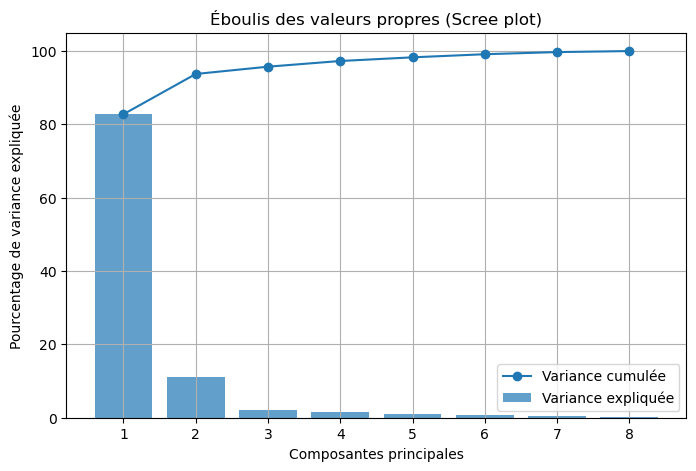

In [7]:
pca = PCA()
pca.fit(X_scaled)  # ACP sur la matrice de corrélation (données centrées-réduites)

# Valeurs propres (variance expliquée par chaque axe)
eigenvalues = pca.explained_variance_
# Proportion de variance expliquée
explained_variance_ratio = pca.explained_variance_ratio_
# Vecteurs propres (composantes)
eigenvectors = pca.components_

print("Valeurs propres :\n", eigenvalues)
print("\nContributions (Variance expliquée) :\n", explained_variance_ratio)
print("\nVecteurs propres (composantes principales) :\n", eigenvectors)

# Éboulis des valeurs propres (Scree plot)
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance_ratio) + 1),
        explained_variance_ratio * 100,
        alpha=0.7,
        label='Variance expliquée')
plt.plot(range(1, len(explained_variance_ratio) + 1),
         np.cumsum(explained_variance_ratio * 100),
         marker='o',
         label='Variance cumulée')
plt.xlabel('Composantes principales')
plt.ylabel('Pourcentage de variance expliquée')
plt.title('Éboulis des valeurs propres (Scree plot)')
plt.legend(loc='best')
plt.grid()
plt.show()


# 5) Charges, contributions et cos² des variables


In [8]:
# Charges (loadings) : corrélation variable / axe
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Contributions des variables aux axes (en %)
contributions_vars = pd.DataFrame(
    loadings ** 2,
    columns=[f'Composante {i+1}' for i in range(loadings.shape[1])],
    index=X.columns
)

for j in range(loadings.shape[1]):
    contributions_vars[f'Contrib. Comp. {j+1}'] = \
        100 * (loadings[:, j] ** 2) / np.sum(loadings[:, j] ** 2)

# Qualité de représentation (cos²) des variables
cos2_vars = pd.DataFrame(
    loadings ** 2,
    columns=[f'Composante {i+1}' for i in range(loadings.shape[1])],
    index=X.columns
)
cos2_totals = np.sum(loadings ** 2, axis=1)  # somme des carrés des charges

for j in range(loadings.shape[1]):
    cos2_vars[f'Cos2 Comp. {j+1}'] = cos2_vars[f'Composante {j+1}'] / cos2_totals

print("\nContributions des variables aux deux premières composantes :")
print(contributions_vars[[f'Contrib. Comp. 1', f'Contrib. Comp. 2']])

print("\nQualité de représentation (cos²) des variables sur les deux premières composantes :")
print(cos2_vars[[f'Cos2 Comp. 1', f'Cos2 Comp. 2']])

# Corrélations variables / axes ( = loadings )
correlations = pd.DataFrame(
    loadings,
    columns=[f'Composante {i+1}' for i in range(loadings.shape[1])],
    index=X.columns
)

print("\nCorrélations des variables avec les deux premières composantes :")
print(correlations[['Composante 1', 'Composante 2']])


Contributions des variables aux deux premières composantes :
          Contrib. Comp. 1  Contrib. Comp. 2
100M             10.084212         32.135010
200M             11.355500         21.309846
400M             12.648365          6.163964
800M             13.592800          0.015450
1500M            13.898719          1.954310
5000M            13.276851          9.736300
10000M           13.452212          9.416297
MARATHON         11.691342         19.268822

Qualité de représentation (cos²) des variables sur les deux premières composantes :
          Cos2 Comp. 1  Cos2 Comp. 2
100M          0.667791      0.282023
200M          0.751978      0.187019
400M          0.837593      0.054096
800M          0.900135      0.000136
1500M         0.920393      0.017151
5000M         0.879212      0.085448
10000M        0.890825      0.082639
MARATHON      0.774218      0.169107

Corrélations des variables avec les deux premières composantes :
          Composante 1  Composante 2
100M        

# 6) Cercle de corrélation


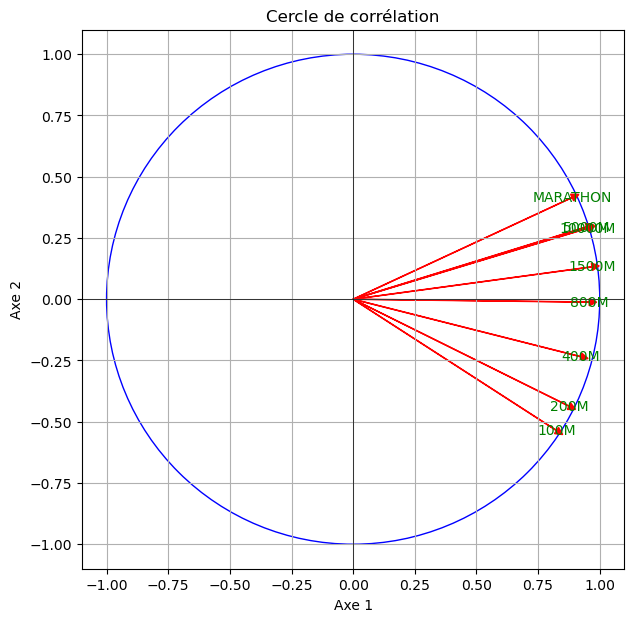

In [9]:
def plot_correlation_circle(loadings, labels, axis1=0, axis2=1):
    fig, ax = plt.subplots(figsize=(7, 7))

    # Cercle unité
    circle = plt.Circle((0, 0), 1, color='b', fill=False, lw=1)
    ax.add_artist(circle)

    # Vecteurs (charges) pour les axes axis1 et axis2
    for i in range(len(labels)):
        x = loadings[i, axis1]
        y = loadings[i, axis2]
        ax.arrow(0, 0, x, y,
                 head_width=0.03,
                 head_length=0.03,
                 fc='r',
                 ec='r')
        ax.text(x, y, labels[i], color='g', ha='center', va='center')

    ax.set_xlim(-1.1, 1.1)
    ax.set_ylim(-1.1, 1.1)
    ax.axhline(0, color='black', lw=0.5)
    ax.axvline(0, color='black', lw=0.5)
    plt.xlabel(f'Axe {axis1+1}')
    plt.ylabel(f'Axe {axis2+1}')
    plt.title('Cercle de corrélation')
    plt.grid()
    plt.show()

labels = X.columns
plot_correlation_circle(loadings, labels, axis1=0, axis2=1)


# 7) Projection des individus


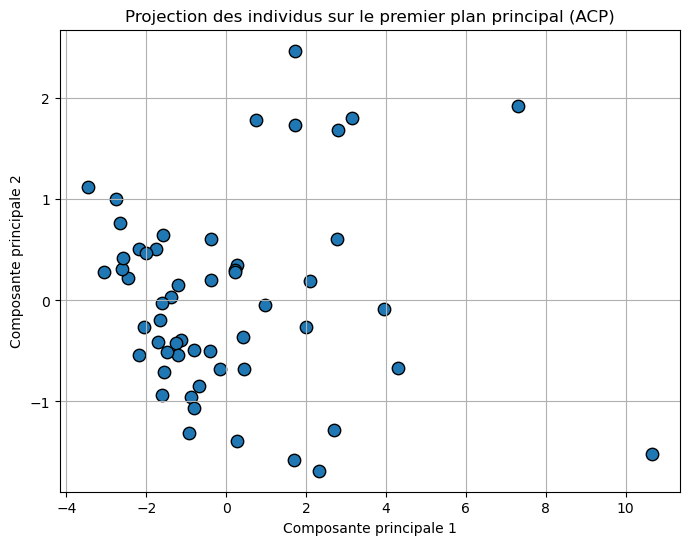

In [10]:
X_pca = pca.transform(X_scaled)  # coordonnées des individus dans le nouvel espace

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=80, edgecolor='k')
plt.title('Projection des individus sur le premier plan principal (ACP)')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.grid()
plt.show()

# 8) Contributions & cos² des individus



Contributions des individus aux deux premières composantes :
   Contrib. Comp. 1  Contrib. Comp. 2
0          0.018832          0.246411
1          1.643173          0.096810
2          0.179093          0.491128
3          1.144021          0.142153
4          0.150048          6.468059

Qualité de représentation (cos²) des individus sur les deux premières composantes :
   Cos2 Comp. 1  Cos2 Comp. 2
0      0.193720      0.335926
1      0.919601      0.007180
2      0.420808      0.152935
3      0.933042      0.015365
4      0.141405      0.807824


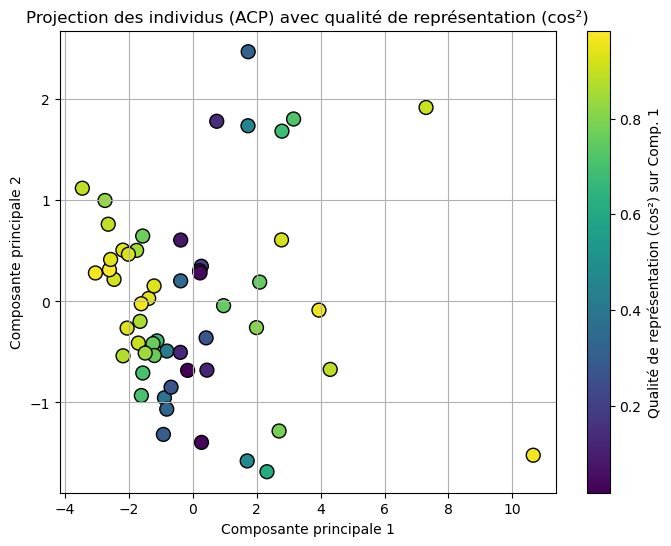

In [11]:
n_samples = X.shape[0]

# Contributions des individus
contributions_indiv = pd.DataFrame(
    X_pca ** 2,
    columns=[f'Composante {i+1}' for i in range(X_pca.shape[1])]
)

for j in range(X_pca.shape[1]):
    contributions_indiv[f'Contrib. Comp. {j+1}'] = \
        100 * (X_pca[:, j] ** 2) / (n_samples * eigenvalues[j])

# Qualité de représentation (cos²) des individus
cos2_indiv = pd.DataFrame(
    X_pca ** 2,
    columns=[f'Composante {i+1}' for i in range(X_pca.shape[1])]
)
dist2_indiv = np.sum(X_pca ** 2, axis=1)  # distance au centre de gravité

for j in range(X_pca.shape[1]):
    cos2_indiv[f'Cos2 Comp. {j+1}'] = cos2_indiv[f'Composante {j+1}'] / dist2_indiv

print("\nContributions des individus aux deux premières composantes :")
print(contributions_indiv[['Contrib. Comp. 1', 'Contrib. Comp. 2']].head())

print("\nQualité de représentation (cos²) des individus sur les deux premières composantes :")
print(cos2_indiv[['Cos2 Comp. 1', 'Cos2 Comp. 2']].head())

# Visualisation des individus avec cos² sur la 1ère composante
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1],
            c=cos2_indiv['Cos2 Comp. 1'],
            cmap='viridis',
            s=100,
            edgecolor='k')
plt.colorbar(label='Qualité de représentation (cos²) sur Comp. 1')
plt.title('Projection des individus (ACP) avec qualité de représentation (cos²)')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.grid()
plt.show()
